In [37]:
DATA_FILE_NAME = 'data/05-03-2022_labeled_comments.csv' 

In [38]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
from modules.read_dataframe import Comments

comments = Comments(dataframe_path=DATA_FILE_NAME)

-> Labeled comments dataframe avaliable in data/05-03-2022_labeled_comments.csv


/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Análise de comentários

In [4]:
NUMERIC_CARACTERS = '0123456789'

def find_numeric_words(dictionary, exclude = []):
    result = []
    for key in dictionary.keys():
        for caracter in NUMERIC_CARACTERS:
            if caracter in key and key not in exclude:
                result.append(key)
                break
            
    return result

def find_alphanumeric_words(list_of_words):
    result = []
    for word in list_of_words:
        for char in word:
            if char not in NUMERIC_CARACTERS:
                result.append(word)
                break
    return result
    
def find_uppercased_words(dictionary, exclude = []):
    result = []
    for key in dictionary.keys():
        if key == key.upper() and key not in exclude:
            result.append(key)
            
    return result

def find_comments_with_laugh(comments):
    result = []
    for comment in comments:
        if comment.count('k') > 2 or comment.count('K') > 2 or comment.count('haha') > 0:
            result.append(comment)
    return result

def print_info(vocabulary, content, title):
    numeric_words = find_numeric_words(vocabulary)
    alphanumeric_words = find_alphanumeric_words(numeric_words)
    uppercased = find_uppercased_words(vocabulary, numeric_words)
    laugh_comments = find_comments_with_laugh(content)

    pt_stopwords = nltk.corpus.stopwords.words('portuguese')
    uppercased_stopwords = [word.upper() for word in pt_stopwords]
    pt_stopwords = pt_stopwords + uppercased_stopwords

    stopwords_in_comments = [x for x in vocabulary.keys() if x in pt_stopwords]
    print('Total words', len(vocabulary.keys()))
    print('Total stopwords:',len(stopwords_in_comments))
    print('Total laughter', len(laugh_comments))
    print('Total uppercased words', len(uppercased))
    print('Total alphanumeric words', len(alphanumeric_words))
    
    all_summary = " ".join(s.upper() for s in content)
    all_summary = ' '.join([a for a in all_summary.split(' ')])
    wordcloud = WordCloud(stopwords=pt_stopwords,
                          colormap='PuRd',
                          background_color='#FFFAFA', width=1600,
                          max_words=100,
                          height=800).generate(all_summary.lower())
    fig, ax = plt.subplots(figsize=(16,8))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()
    plt.imshow(wordcloud)
    
    wordcloud.to_file(f'{title}_word_cloud.png',);

Total words 8779
Total stopwords: 227
Total laughter 139
Total uppercased words 777
Total alphanumeric words 57


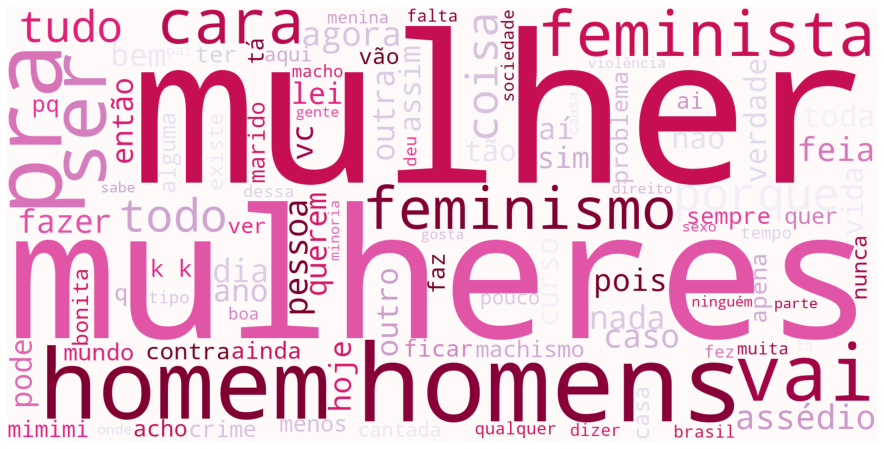

In [5]:
print_info(comments.sexist_vocabulary, comments.sexist_comments['content'], 'sexist')

Total words 8511
Total stopwords: 225
Total laughter 81
Total uppercased words 736
Total alphanumeric words 38


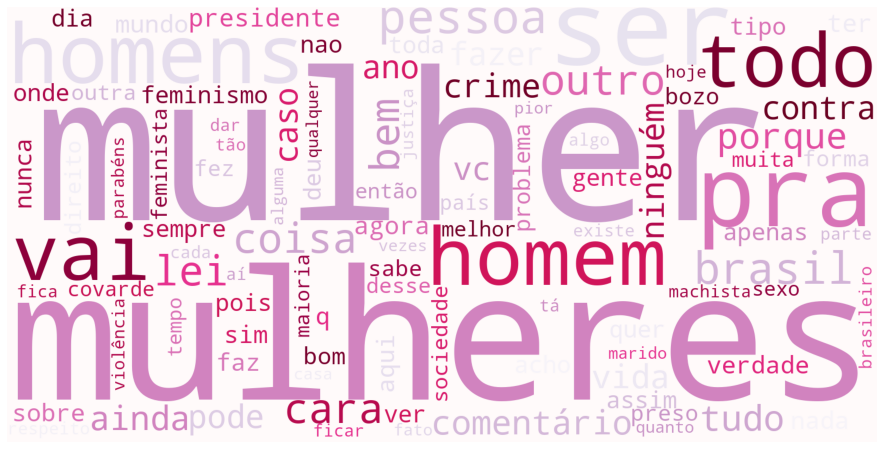

In [6]:
print_info(comments.not_sexist_vocabulary, comments.not_sexist_comments['content'], 'not_sexist')

Total words 690
Total stopwords: 78
Total laughter 3
Total uppercased words 14
Total alphanumeric words 0


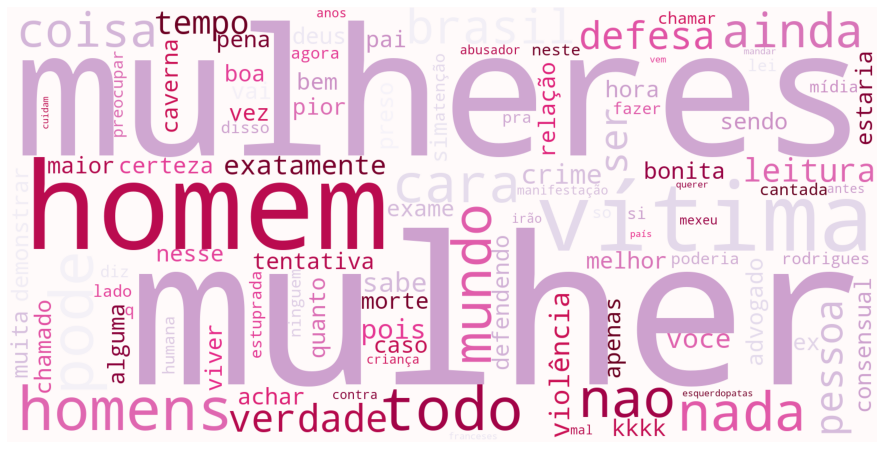

In [7]:
print_info(comments.undefined_vocabulary, comments.undefined_comments['content'], 'undefined')

In [8]:
# import pandas as pd

# likes_dislikes_query = '''
# select sum(likes) as sum_likes,
#        sum(dislikes) as sum_dislikes,
#        avg(likes) as avg_likes,
#        avg(dislikes) as avg_dislikes,
#        min(likes) as min_likes,
#        min(dislikes) as min_dislikes,
#        max(likes) as max_likes,
#        max(dislikes) as max_dislikes,
#        median(likes) as median_likes,
#        median(dislikes) as median_dislikes,
#        case
#             when avg > 0.5 then 'sexista'
#             when avg < 0.5 then 'não sexista'
#             when avg = 0.5 then 'não definido'
#         end as label
# from results
# group by (label);
# '''

# from modules.database_connector import Database
# print('-> Configuring database...')
# database = Database()
# conn = database.get_connection()
# print('-> Database setup is done!')

# likes_dislikes_df = pd.read_sql_query(likes_dislikes_query, conn)
# likes_dislikes_df.to_csv('data/likes_dislikes.csv', sep=';')

In [9]:
# comments.sexist_comments['content'].to_csv('data/sexist_comments.csv')

In [10]:
comments.dataframe

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,likes,dislikes,char-qty,word-qty,legibility-index,sexist
1367,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,2.0,0.0,0.0,686,117,228.58,1
142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,8.0,37,8,230.14,0
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,18,2,204.50,0
457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,13.0,60.0,182,33,221.43,1
391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,8.0,148,20,230.22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,121,19,229.05,1
416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,217,33,224.14,0
1662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,12,1,163.22,0
654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,63,13,229.22,1


In [15]:
comments.pos_tagging_tf

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1707,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1708,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0
1709,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0
1710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
numeric_words = find_numeric_words(comments.sexist_vocabulary)
alphanumeric_words = find_alphanumeric_words(numeric_words)
for key in alphanumeric_words:
    print(key,':', comments.sexist_vocabulary[key])

In [30]:
numeric_words = find_numeric_words(comments.not_sexist_vocabulary)
alphanumeric_words = find_alphanumeric_words(numeric_words)
for key in alphanumeric_words:
    print(key,':', comments.not_sexist_vocabulary[key])

12x : 1
160x32 : 1
16processos : 1
1D10T4S : 1
1MB3C1L : 2
1a : 1
22h : 1
24hrs : 2
2h : 1
30cm : 1
4x : 1
74a : 1
B_uurrr0 : 1
Bol22onaro : 1
CR7 : 2
G1 : 12
Globonews247 : 1
JairMessias2022 : 1
MACR0N : 1
R4B0 : 1
S2 : 1
art26 : 1
boz0loide : 1
c0mem : 1
c0mplexo : 1
col0nizados : 1
d3dos : 1
esquerd0sos : 1
g1 : 2
imund4s : 1
inferi0ridade : 1
k3i : 1
macac0s : 1
mij4 : 1
s0ciedade : 1
seguiss3 : 1
ta0 : 1
z3rula : 1


In [54]:
comments.sexist_comments.head()

,comment_id,content,likes,dislikes,votes,avg,std,label,char-qty,word-qty,legibility-index
1,273,Canhão de guerra.,2.0,4.0,3,1.000000,0.00000,1,18,4,190.91
2,2574,femi o que?,10.0,11.0,3,1.000000,0.00000,1,11,3,217.59
3,951,Concordo plenamente Jaqueline!! Outro dia ouvi...,20.0,0.0,3,0.666667,0.57735,1,161,27,228.87
4,2520,Feminista é uma mulher encalhada que precisa d...,11.0,11.0,4,1.000000,0.00000,1,66,11,226.84
5,2614,pareceu um mal súbito!,3.0,2.0,4,1.000000,0.00000,1,22,4,223.62


In [59]:
comments.sexist_comments['likes'].describe()

count    1708.000000
mean       17.719555
std        39.877321
min         0.000000
25%         2.000000
50%         7.000000
75%        16.000000
max       688.000000
Name: likes, dtype: float64

In [60]:
comments.sexist_comments['dislikes'].describe()

count    1708.000000
mean       13.120023
std        50.503687
min         0.000000
25%         0.000000
50%         2.000000
75%         8.000000
max      1196.000000
Name: dislikes, dtype: float64

In [61]:
comments.sexist_comments['word-qty'].describe()

count    1821.000000
mean       24.602965
std        23.833603
min         1.000000
25%         9.000000
50%        17.000000
75%        31.000000
max       176.000000
Name: word-qty, dtype: float64

In [62]:
comments.sexist_comments['char-qty'].describe()

count    1821.000000
mean      139.797913
std       137.304962
min         2.000000
25%        51.000000
50%        95.000000
75%       177.000000
max       958.000000
Name: char-qty, dtype: float64

In [68]:
comments.sexist_comments['legibility-index'].describe()

count    1821.000000
mean      223.953432
std        13.723964
min        -5.300000
25%       223.620000
50%       228.580000
75%       229.900000
max       230.300000
Name: legibility-index, dtype: float64

---

In [63]:
comments.not_sexist_comments['likes'].describe()

count    1579.000000
mean       13.557315
std        40.662227
min         0.000000
25%         1.000000
50%         4.000000
75%        12.000000
max       729.000000
Name: likes, dtype: float64

In [64]:
comments.not_sexist_comments['dislikes'].describe()

count    1579.000000
mean        6.416086
std        29.847156
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max       842.000000
Name: dislikes, dtype: float64

In [65]:
comments.not_sexist_comments['word-qty'].describe()

count    1712.000000
mean       23.926986
std        23.240212
min         1.000000
25%         8.000000
50%        16.000000
75%        32.250000
max       159.000000
Name: word-qty, dtype: float64

In [66]:
comments.not_sexist_comments['char-qty'].describe()

count    1712.000000
mean      137.175234
std       134.949975
min         2.000000
25%        44.000000
50%        91.000000
75%       183.000000
max       950.000000
Name: char-qty, dtype: float64

In [67]:
comments.not_sexist_comments['legibility-index'].describe()

count    1712.000000
mean      222.318808
std        17.514909
min         0.000000
25%       223.387500
50%       227.970000
75%       229.710000
max       230.300000
Name: legibility-index, dtype: float64

---

In [5]:
comments.sexist_pos_vocab

{'ADJ': 0,
 'ADJ ADJ': 1,
 'ADJ ADP': 2,
 'ADJ ADV': 3,
 'ADJ AUX': 4,
 'ADJ CCONJ': 5,
 'ADJ DET': 6,
 'ADJ NOUN': 7,
 'ADJ PRON': 8,
 'ADJ PROPN': 9,
 'ADJ PUNCT': 10,
 'ADJ SCONJ': 11,
 'ADJ SPACE': 12,
 'ADJ VERB': 13,
 'ADP ADJ': 14,
 'ADP ADP': 15,
 'ADP ADV': 16,
 'ADP DET': 17,
 'ADP NOUN': 18,
 'ADP NUM': 19,
 'ADP PRON': 20,
 'ADP PROPN': 21,
 'ADP PUNCT': 22,
 'ADP SCONJ': 23,
 'ADP SPACE': 24,
 'ADP VERB': 25,
 'ADV': 26,
 'ADV ADJ': 27,
 'ADV ADP': 28,
 'ADV ADV': 29,
 'ADV AUX': 30,
 'ADV CCONJ': 31,
 'ADV DET': 32,
 'ADV INTJ': 33,
 'ADV NOUN': 34,
 'ADV NUM': 35,
 'ADV PRON': 36,
 'ADV PROPN': 37,
 'ADV PUNCT': 38,
 'ADV SCONJ': 39,
 'ADV SPACE': 40,
 'ADV VERB': 41,
 'AUX': 42,
 'AUX ADJ': 43,
 'AUX ADP': 44,
 'AUX ADV': 45,
 'AUX AUX': 46,
 'AUX DET': 47,
 'AUX NOUN': 48,
 'AUX NUM': 49,
 'AUX PRON': 50,
 'AUX PROPN': 51,
 'AUX PUNCT': 52,
 'AUX SCONJ': 53,
 'AUX SPACE': 54,
 'AUX VERB': 55,
 'CCONJ': 56,
 'CCONJ ADJ': 57,
 'CCONJ ADP': 58,
 'CCONJ ADV': 59,
 'CCONJ A

In [30]:
import spacy
quantidades = {}
palavras = {}

nlp = spacy.load('pt_core_news_md')
for word in comments.sexist_words['word']:
    tag = nlp(word)
    if tag[0].pos_ in (quantidades.keys()):
        quantidades[tag[0].pos_] += 1
        palavras[tag[0].pos_].append(word)
    else:
        quantidades[tag[0].pos_] = 1
        palavras[tag[0].pos_] = [word]


In [31]:
quantidades

{'NOUN': 460,
 'PRON': 42,
 'ADP': 33,
 'NUM': 20,
 'DET': 30,
 'ADJ': 154,
 'VERB': 417,
 'SCONJ': 12,
 'ADV': 87,
 'CCONJ': 8,
 'AUX': 37,
 'PROPN': 82,
 'PUNCT': 1,
 'INTJ': 1}

In [36]:
palavras['ADJ']

['feia',
 'feministas',
 'feminista',
 'mimimi',
 'minoria',
 'bonita',
 'mesmas',
 'igual',
 'fácil',
 'simples',
 'kkkkk',
 'feias',
 'iguais',
 'beta',
 'falsa',
 'bêbado',
 'humanas',
 'velha',
 'feio',
 'tb',
 'feminino',
 'santa',
 'rica',
 'lésbicas',
 'sozinha',
 'sensata',
 'útil',
 'cheio',
 'feminazi',
 'sério',
 'inocente',
 'feminina',
 'marxista',
 'responsável',
 'internacional',
 'suficiente',
 'natural',
 'cheia',
 'comum',
 'famoso',
 'hipócrita',
 'pronto',
 'primeiro',
 'podre',
 'complicado',
 'verdadeira',
 'bonitas',
 'sexuais',
 'famosas',
 'barato',
 'kkkkkkkk',
 'rico',
 'superior',
 'sexual',
 'francesa',
 'militar',
 'masculina',
 'nova',
 'física',
 'idiota',
 'kkkk',
 'boa',
 'arrogante',
 'disposto',
 'donas',
 'conveniente',
 'eterna',
 'lamentável',
 'rosa',
 'unica',
 'maduro',
 'patriarcal',
 'maluco',
 'violentas',
 'verdadeiro',
 'ridícula',
 'reais',
 'branco',
 'chata',
 'casado',
 'profissional',
 'feminicidio',
 'duras',
 'brasileira',
 'linda',